| Column        | Description                                                                                                               |
| ------------- | ------------------------------------------------------------------------------------------------------------------------- |
| `footfall`    | Number of people or objects passing by the machine — can affect heat, dust levels, usage rate.                            |
| `tempMode`    | The **temperature setting** or operational mode — could reflect how hard the machine is running.                          |
| `AQ`          | **Air Quality** around the machine — poor air might correlate with higher failure risk (e.g., dust).                      |
| `USS`         | **Ultrasonic Sensor** — typically measures **distance to nearby objects**, might help detect obstruction or misalignment. |
| `CS`          | **Current Sensor** — measures how much **electrical current** the machine is using. Spikes or drops may indicate issues.  |
| `VOC`         | **Volatile Organic Compounds** — high levels may indicate overheating, leaking fluids, or burning components.             |
| `RP`          | **Rotational Position** or RPM — tells us how fast rotating parts are moving. Irregularities may precede failure.         |
| `IP`          | **Input Pressure** — how much pressure is being fed into the machine; anomalies might signal leaks or clogs.              |
| `Temperature` | The **actual operating temperature** — high temperatures often precede mechanical or electrical failure.                  |
| `fail`        | The **label (target)**:                                                                                                   |


In [78]:
import pandas as pd

df = pd.read_csv("/home/lubi/machine_failure_lx.csv")

df.head()


,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature,fail
0,0,7,7,1,6,6,36,3,1,1
1,190,1,3,3,5,1,20,4,1,0
2,31,7,2,2,6,1,24,6,1,0
3,83,4,3,4,5,1,28,6,1,0
4,640,7,5,6,4,0,68,6,1,0


In [ ]:
#dataset dimension
df.shape

(944, 10)

In [ ]:
# there are not Nan
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 944 entries, 0 to 943
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   footfall     944 non-null    int64
 1   tempMode     944 non-null    int64
 2   AQ           944 non-null    int64
 3   USS          944 non-null    int64
 4   CS           944 non-null    int64
 5   VOC          944 non-null    int64
 6   RP           944 non-null    int64
 7   IP           944 non-null    int64
 8   Temperature  944 non-null    int64
 9   fail         944 non-null    int64
dtypes: int64(10)
memory usage: 73.9 KB


In [22]:
df.describe()

,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature,fail
count,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000
mean,306.381356,3.727754,4.325212,2.939619,5.394068,2.842161,47.043432,4.565678,16.331568,0.416314
std,1082.606745,2.677235,1.438436,1.383725,1.269349,2.273337,16.423130,1.599287,5.974781,0.493208
min,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,19.000000,1.000000,1.000000,0.000000
25%,1.000000,1.000000,3.000000,2.000000,5.000000,1.000000,34.000000,3.000000,14.000000,0.000000
50%,22.000000,3.000000,4.000000,3.000000,6.000000,2.000000,44.000000,4.000000,17.000000,0.000000
75%,110.000000,7.000000,6.000000,4.000000,6.000000,5.000000,58.000000,6.000000,21.000000,1.000000
max,7300.000000,7.000000,7.000000,7.000000,7.000000,6.000000,91.000000,7.000000,24.000000,1.000000


The range from 0 to 7 is the same in tempmode,AQ,USS,CS. For VOC the reange is from 0 to 6. For VOC and tempMode the min is 0, for AQ , USS, CS the min is 1. 

Do the values make sense?



The tempmode for 0 is meaningless? A off-machine cannot fail, right?

In [14]:
df[df['tempMode'] == 0]['fail'].value_counts()

fail
0    94
1    67
Name: count, dtype: int64

Givne the hig rates of failures when tempMode ==0, scuh failure cannot be critical(e.g. data logging errors. Maybe, Could be sampling timing mismatch: maybe the machine had just failed and then switched to standby.

The col Temperature ranges from 0 to 24 (celsisus/far?), Which kind of machine this range represents?

List of possible machines/device to which the dataset could refer

+ HVAC System (Heating, Ventilation, Air Conditioning)
Why it fits:

VOC monitoring: Common in indoor air quality systems.

Temperature: HVAC units operate between 10–30°C for air conditioning or heating.

RPM: Fans/compressors run at variable RPMs.

Input pressure: Seen in air ducts or refrigerant lines.

+ Industrial Air Compressor
Why it fits:

RPM for internal rotors or pumps.

VOC and AQ for environmental monitoring (especially in closed plants).

Input pressure: Directly controlled to output compressed air.

Temperature: Compressors generate heat; temp needs monitoring.

+ Injection Molding Machine (Plastics/Manufacturing)
Why it fits:

Uses input pressure (hydraulics/pneumatics).

Rotating parts (screw motors → RPM).

VOCs (heating plastic releases fumes).

Operating temperature is often managed tightly in mid-20°Cs.

+ CNC Milling or Lathe Machine
Why it fits:

RPM from spindles.

Input pressure (coolant or pneumatics).

VOCs from cutting lubricants or material vapor.

Moderate operating temperature, depending on operation load.

+ 3D Printer (Industrial-Grade)
Why it fits:

RPM for filament feed or part movement.

VOCs from plastic/resin printing.

Input pressure if using air-assist or enclosed chamber management.

Temp in 20°C range makes sense for housing.

+ Smart Factory Robot Arm (Collaborative Robot)
Why it fits:

Uses pressure sensors for pneumatics.

Rotational sensors (joints = RP).

VOCs if in contact with chemicals.

Temp might relate to environment or motor heating.

/home/lubi/Py3.19/lib/python3.9/site-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/home/lubi/Py3.19/lib/python3.9/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/tmp/ipykernel_1739/1026829487.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


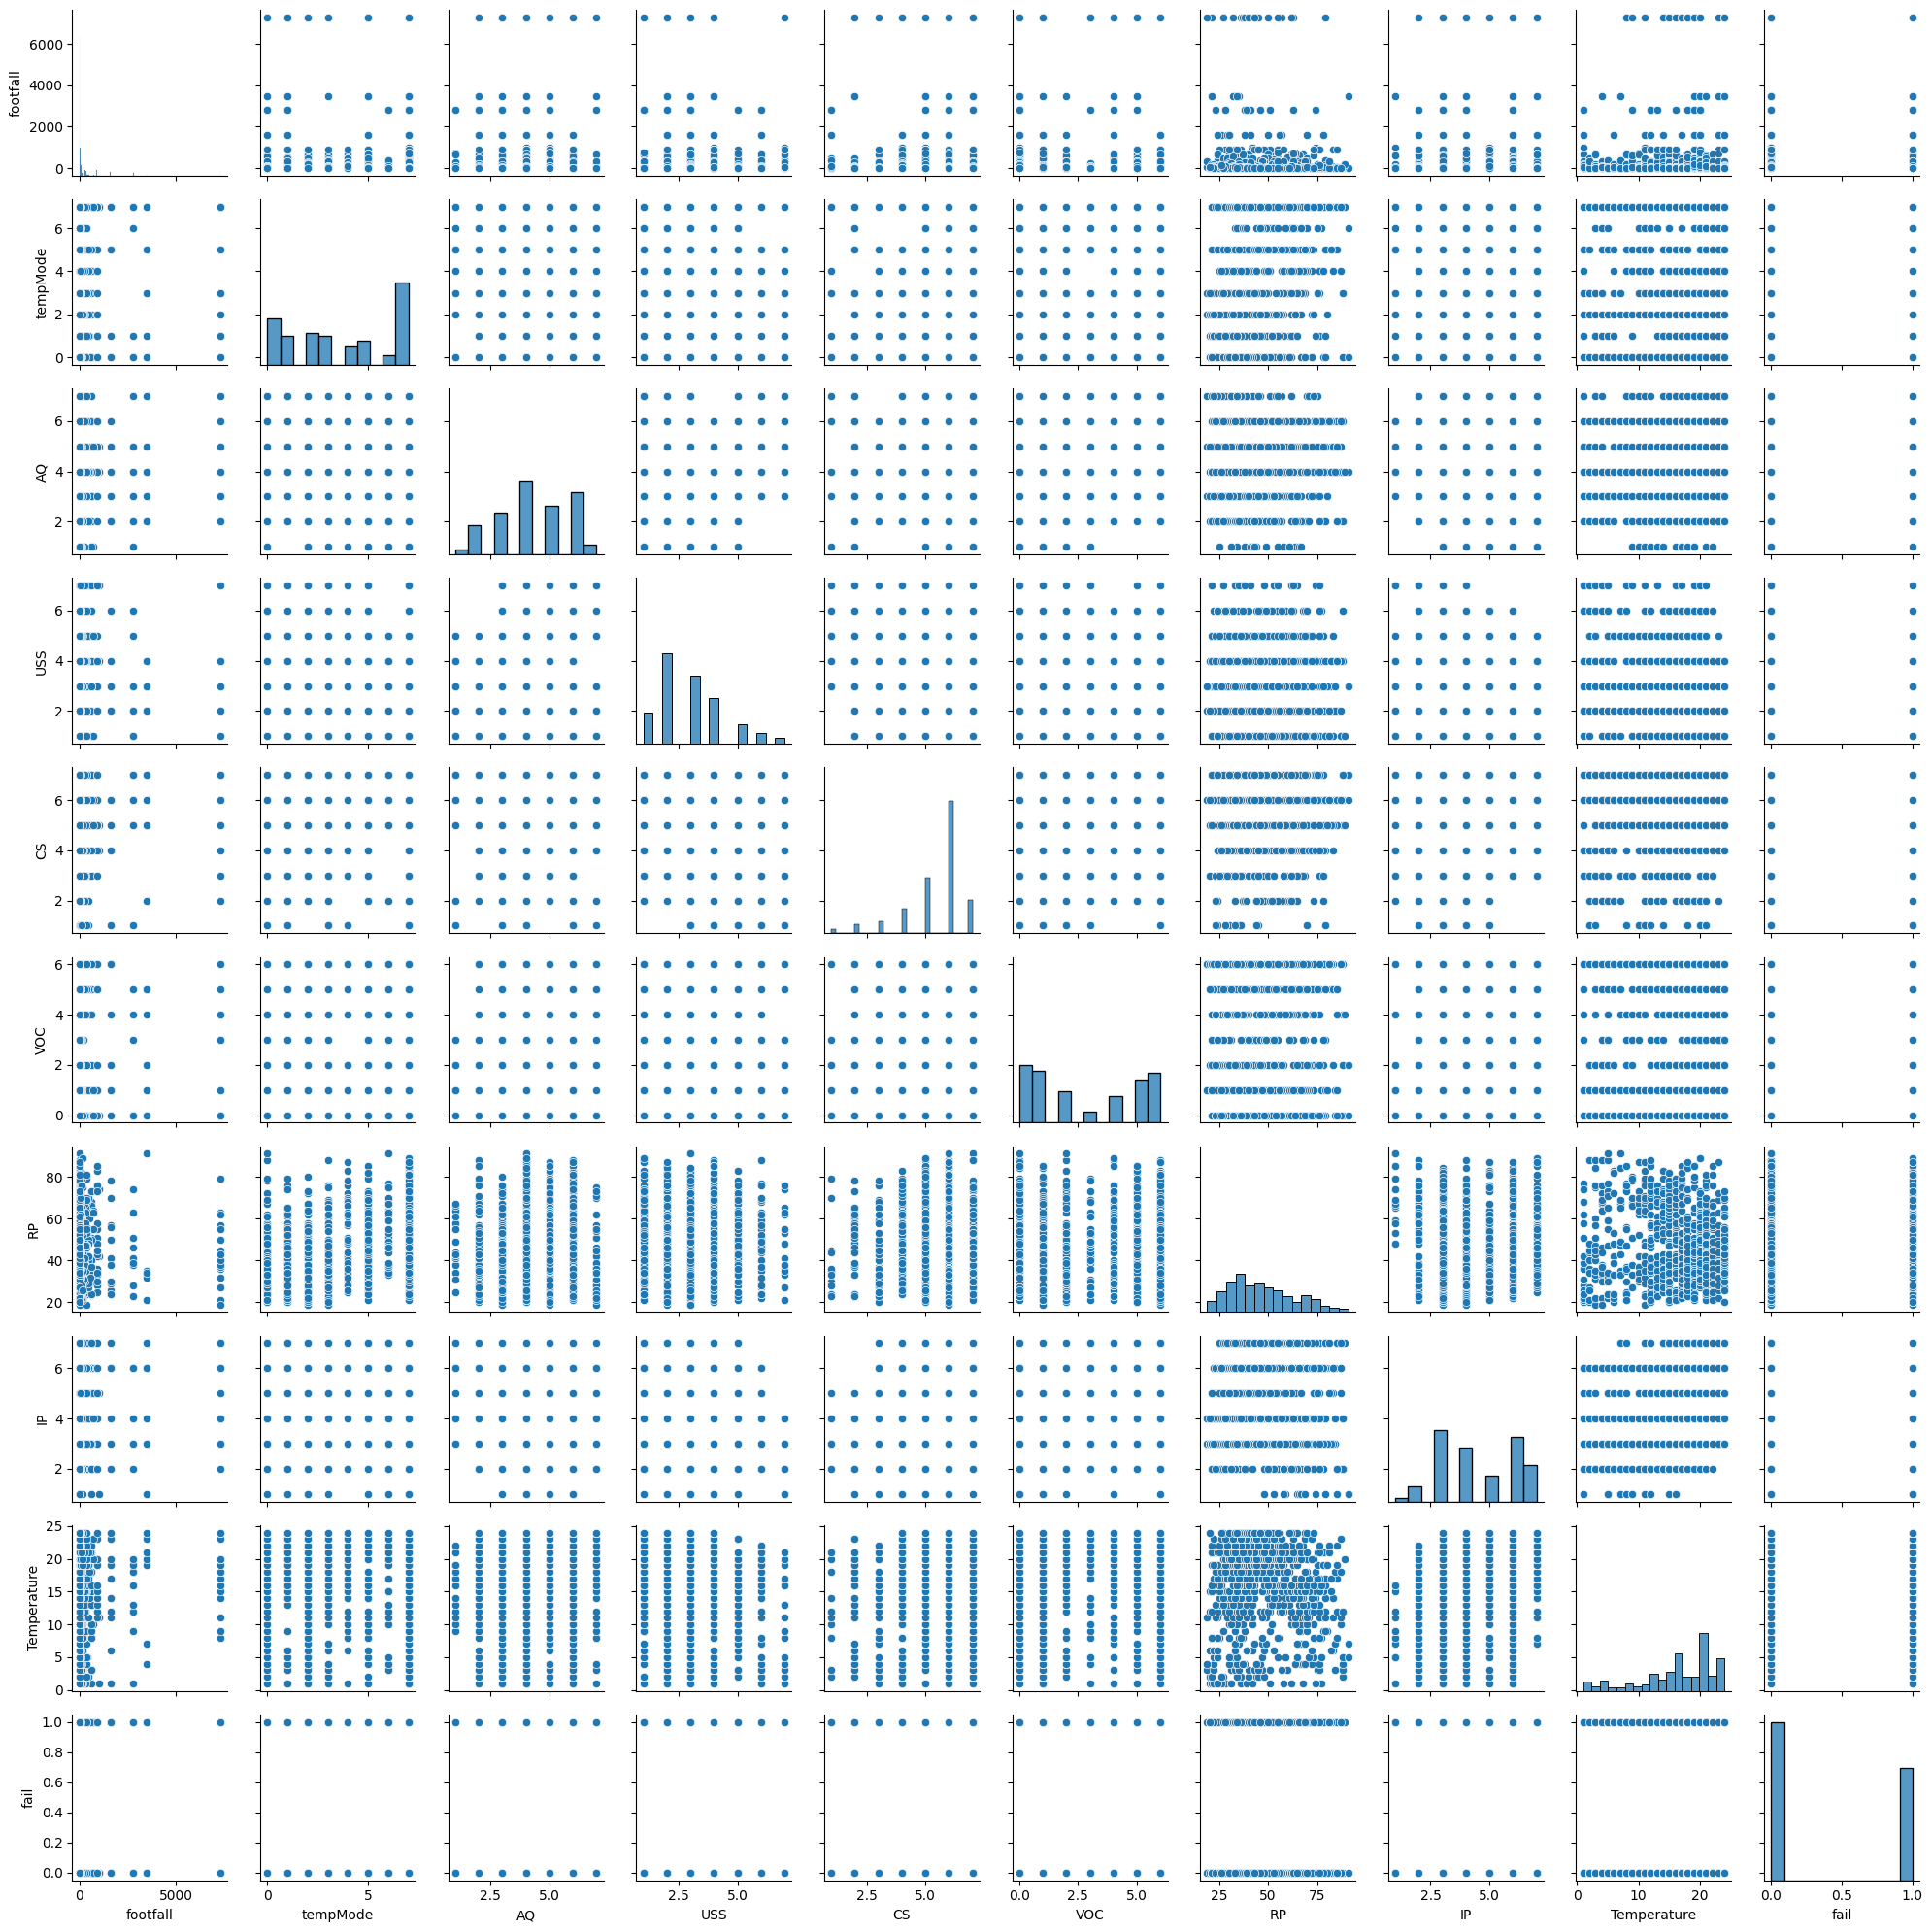

In [ ]:
# scatter matrix to see features correlation

import matplotlib.pyplot as plt
import seaborn as sns
col = ['footfall',	'tempMode',	'AQ',	'USS',	'CS',	'VOC',	'RP',	'IP',	'Temperature', 'fail']

sns.pairplot(df[col], size = 2)
plt.tight_layout()
plt.show()

<Axes: xlabel='footfall'>

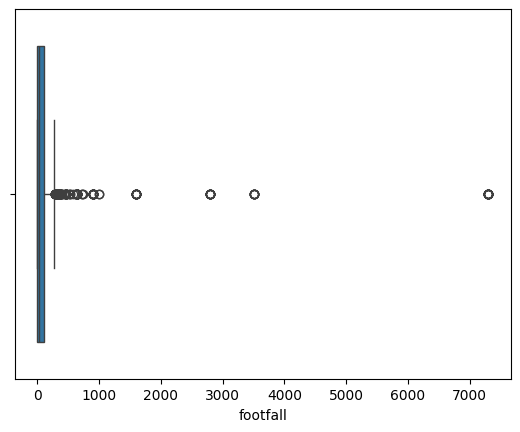

In [ ]:
# There are some outliers, yet not relevant
sns.boxplot(x = df['footfall'])

<Axes: xlabel='fail', ylabel='percent'>

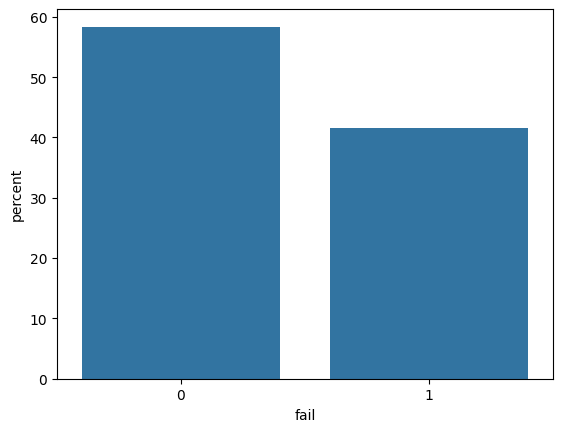

In [ ]:
#there is some class imbalance (not significant)
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(df, x="fail", stat="percent")

In [ ]:
# import pandas as pd

# # Calculate the Spearman's rank correlation coefficient
# corr = df['footfall'].corr(df['fail'], method='spearman')

# print('Spearman\'s rank correlation coefficient:', corr)

In [50]:
# import pandas as pd

# # Spearman correlation of all features with 'fail'
# correlations = df.corr(method='pearson')['fail'].sort_values(ascending=False)

# print(correlations)

In [ ]:
# import pandas as pd

# # Spearman correlation of all features with 'fail'
# correlations = df.corr(method='spearman')['fail'].sort_values(ascending=False)

# print(correlations)

In [ ]:
#Investigate correlation with Spearman
import pandas as pd

correlation_matrix= df.corr(method='spearman')

fail_correlations = correlation_matrix['fail'].sort_values(ascending=False)

print(fail_correlations)

fail           1.000000
VOC            0.766285
AQ             0.598449
Temperature    0.188352
IP             0.084827
RP             0.052767
tempMode      -0.017532
CS            -0.084297
footfall      -0.173045
USS           -0.497865
Name: fail, dtype: float64


<Axes: >

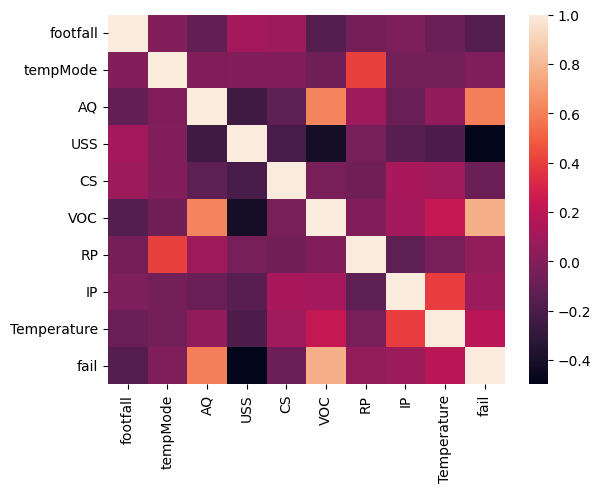

In [ ]:
# heatmap spearman
sns.heatmap(correlation_matrix,
         xticklabels=correlation_matrix.columns,
         yticklabels=correlation_matrix.columns)

Given the correlation, we will try to use VOC, AQ, USS, TEMPERATURE (possibly footfall) as input

In [84]:
# Features selection
X = df[['VOC','AQ','USS','Temperature']]
y = df['fail']

In [85]:
# create train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [88]:
# transforms features to have zero mean and unit variance.
# This avoids models being biased by features with large values.

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std= scaler.transform(X_test)

Stochastic Gradient Descent

In [104]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
import numpy as np

# Initialize the SGD
sgd = SGDClassifier(random_state=1)

# Define the hyperparameters
params = {
    'loss': ['hinge', 'log_loss', 'modified_huber'],
    'penalty': ['l2', 'l1', 'elasticnet'],
    'alpha': np.logspace(-4, -1, 4)
}

# K-fold cross-validation
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

# GridSearchCV
gridsearch_sgd = GridSearchCV(
    sgd, params,
    scoring='roc_auc',
    cv=kfold,
    verbose=1
)

# Fit GridSearchCV
gridsearch_sgd.fit(X_train_std, y_train)

# Evaluate
roc_auc = gridsearch_sgd.score(X_test_std, y_test)
print(f"ROC AUC on Test Set: {roc_auc:.3f}")
print(f"Selected Hyperparameters: {gridsearch_sgd.best_params_}")

Fitting 5 folds for each of 36 candidates, totalling 180 fits
ROC AUC on Test Set: 0.963
Selected Hyperparameters: {'alpha': 0.1, 'loss': 'hinge', 'penalty': 'elasticnet'}


In [105]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import roc_curve, auc

In [106]:
sgd = SGDClassifier(loss='log_loss', penalty= "elasticnet", class_weight='balanced', alpha = 0.1, random_state = 1)   #elasticnet
sgd.fit(X_train_std, y_train)

#Predict
y_pred_class= sgd.predict(X_test_std)

In [107]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred_class))
print(classification_report(y_test, y_pred_class))

[[96  9]
 [ 7 77]]
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       105
           1       0.90      0.92      0.91        84

    accuracy                           0.92       189
   macro avg       0.91      0.92      0.91       189
weighted avg       0.92      0.92      0.92       189



True negative = 96

True positive = 77

False positive = 9

False negative = 7



The confusion matrix shows that the classifier correctly predicted:

+ 96 instances of class 0 (no failure)

+ 77 instances of class 1 (failure)

It misclassified:

+ 9 instances of class 0 as class 1 (false positives)

+ 7 instances of class 1 as class 0 (false negatives)

Overall, the model demonstrates a high level of accuracy, with a balanced performance across both classes. The low number of false positives and false negatives indicates that the classifier is effectively distinguishing between the failure and non-failure cases.

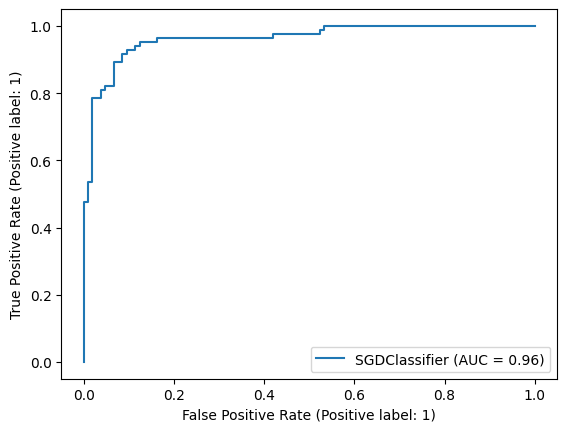

In [110]:
from sklearn.metrics import RocCurveDisplay
sgd_disp = RocCurveDisplay.from_estimator(sgd, X_test_std, y_test)
plt.show()

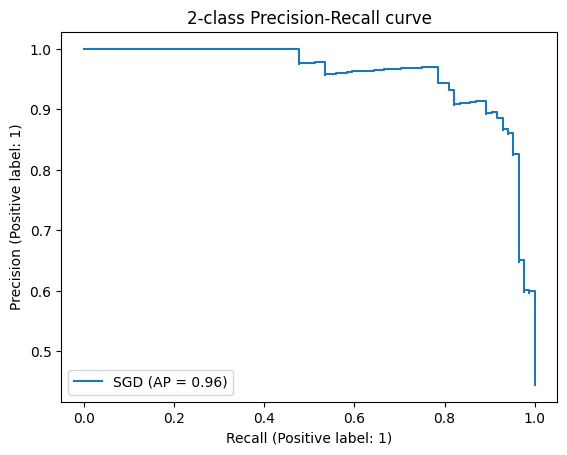

In [111]:
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    sgd, X_test_std, y_test, name="SGD",
)
_ = display.ax_.set_title("2-class Precision-Recall curve")